In [57]:

import matplotlib.pyplot as plt
import numpy as np 
from PIL import Image
import operator
import cv2
%matplotlib inline



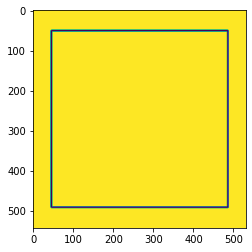

In [58]:
im = Image.open("square.jpg").convert('L')

plt.imshow(im)
im.save('greyscale.png')

In [59]:
grey_image = Image.open('greyscale.png')
grey_image = np.asarray(grey_image)
print(grey_image.shape)

(543, 531)


In [60]:
def find_shi_tomasi(img, maxCor, thresh, dst):

    # Find x and y derivatives
    dy, dx = np.gradient(img)
    Ixx = dx ** 2
    Iyy = dy ** 2
    # Ixy = dy*dx

    height = img.shape[0]
    width = img.shape[1]
    offset = 0  # customizable window size offset

    cornerList = []
    # Search corners in image
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            # Calculate sum of squares
            windowIxx = Ixx[y - offset:y + offset + 1, x - offset:x + offset + 1]
            windowIyy = Iyy[y - offset:y + offset + 1, x - offset:x + offset + 1]
            # windowIxy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1]

            Sxx = windowIxx.sum()
            Syy = windowIyy.sum()
            # Sxy = windowIxy.sum()

            # Find determinant and trace, for Harris corner detection
            # det = (Sxx * Syy) - (Sxy**2)
            # trace = Sxx + Syy

            # If Sxx(lambda1) and Syy(lambda2) have large positive
            # values, then a corner is found.
            r = min(Sxx, Syy)
            # r = det - k*(trace**2)

            # Threshold for corner
            if r > thresh:
                cornerList.append([x, y, r])

    return cornerList


In [61]:
maxCorners = 500
thresh = 1000
dist = 100


Corners_list = find_shi_tomasi(grey_image, maxCorners, thresh, dist)
tmpImage = grey_image.copy()
for corner in Corners_list:
    cv2.circle(tmpImage, (corner[0], corner[1]), 3 ,128 , -1)
    cv2.imwrite("Final_Image.jpg", tmpImage)
    
    


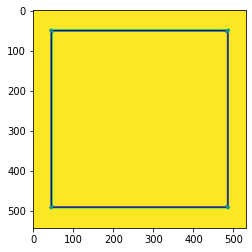

In [62]:
im1= Image.open("Final_image.jpg").convert('L')

plt.imshow(im1)